### Imports

In [21]:
# ipython notebook style figures
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# imports
import sys
# module for manipulating data symphony specific data
from ts import data
# module for time series analysis
from ts import model
import pandas
import numpy as np

### Data

In [22]:
# list indicators stored in the database
data.printIndicators()

PRAGUESE/PX Praxair Inc. (PX) Stock Price
BLSN/EIUCOASEANZ334 Import/Export Price Indexes: Computer and electronic product manufacturing
BLSE/CES9000000001 Employment - All employees, thousands; Government industry
BLSE/CEU0000000001 Employment - All employees, thousands; Total nonfarm industry
BLSE/CEU0000000010 Women Employees: Total Nonfarm
ECB/STS_M_I6_N_UNEH_LTT000_4_000 Standardised unemployment, Level, Total , Total ; Eurostat;
ECB/RTD_M_S0_N_E_ERC0_NGR_X Euro area Exchange rate, ECB real effective exchange rate CPI deflated, narrow group of currencies against euro Index
FRED/M1490BUSM157SNBR Total Money Supply for United States
ECB/RTD_M_S0_N_P_P_MANUF_DS_X Euro area Producer Price Index, domestic sales, Manufacturing Index
ECB/RTD_M_S0_N_P_P_XCONS_DS_X Euro area Producer Price Index, domestic sales, Total Industry Index
ECB/RTD_M_S0_N_P_P_ENERG_DS_X Euro area Producer Price Index, domestic sales, MIG Energy Index
ECB/RTD_M_S0_W_I_CONST_X Euro area Industrial Production Index, 

In [23]:
# choose an indicator (it can be an idicator available from quandl that is not in the database already)
indicator_name = "ECB/FM_M_U2_EUR_4F_MM_EONIA_HSTA"

In [24]:
# get the indicator (either from the db or using quandl api)
indicator = data.getIndicator(indicator_name)
# print first 3 values of the indicator
print indicator[0:3]

[6.84, 6.73, 6.68]


### Forward chaining prediction

In [25]:
# Forward chaining is a method that uses n-1 data points to build a model and tries to predict the n-th value.
# First argument is the datapoints list, the second argument (N) is the number of last data points fro the forward chaining  
# e.g.: fit(0..n-(N-1)), predict(n-(N-2)); fit(0..n-(N-2)),predict(n-(N-3)); fit(0..n-1), predict(n).
# output is a tuple: (fc predicted values list, x-axis values, {NRMSD, RMSE})

#ar = model.AR(indicator)
#fc_ar = model.AR_validation_fc(indicator,24)
#fc_arma = model.ARMA_validation_fc(indicator,24)

ar = model.AR(indicator)
arma = model.ARMA(indicator)
fc_ar = model.AR_val(indicator,24)
fc_ar1 = model.AR_fc(indicator,24)
fc_arma = model.ARMA_val(indicator,24)
fc_arma1 = model.ARMA_fc(indicator,24)
# Validation based on previous value
prev_val = model.validation_prev(indicator,24)
#fc_ar = model.AR_validation_fc(indicator,24)
#fc_arma = model.ARMA_validation_fc(indicator,24)

### Validation

In [26]:
print "AR: ",fc_ar[2]
print "AR1: ",fc_ar1[2]
print "ARMA: ",fc_arma[2]
print "ARMA1: ",fc_arma1[2]
print "prev val: ",prev_val[1]

AR:  {'NRMSD': 0.11869122602276007, 'RMSE': 0.05606191333370215}
AR1:  {'NRMSD': 0.11773590998308815, 'RMSE': 0.05799670925766923}
ARMA:  {'NRMSD': 0.096515978195426844, 'RMSE': 0.04612906614229124}
ARMA1:  {'NRMSD': 0.09517588878504094, 'RMSE': 0.04688364281551117}
prev val:  {'NRMSD': 0.09790774479055424, 'RMSE': 0.04434241761564202}


### Plots

#### Autocorrelation

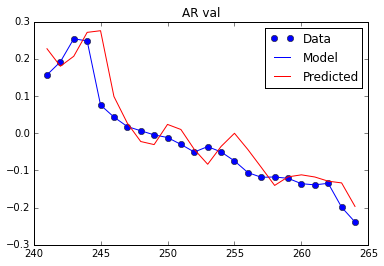

In [27]:
model.plot_pred("AR val", indicator, indicator, fc_ar[0], fc_ar[1])
#model.plot_pred("AR val", indicator, indicator, ar_v[0], ar_v[1])

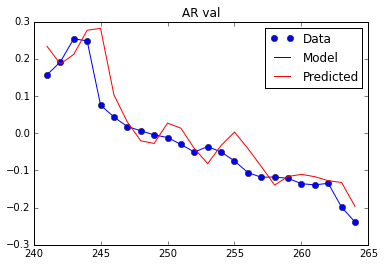

In [28]:
model.plot_pred("AR val", indicator, indicator, fc_ar1[0], fc_ar[1])

#### Autoregressive-moving-average

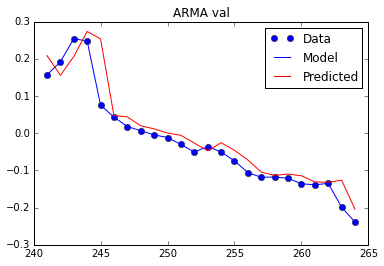

In [29]:
model.plot_pred("ARMA val", indicator, indicator, fc_arma[0], fc_arma[1])

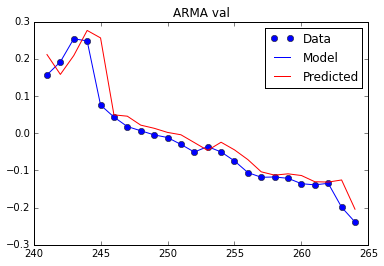

In [30]:
model.plot_pred("ARMA val", indicator, indicator, fc_arma1[0], fc_arma1[1])

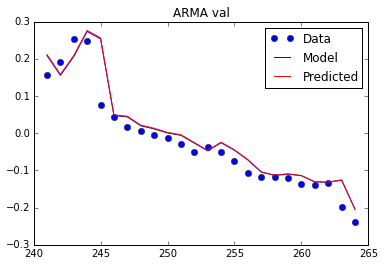

In [31]:
model.plot_pred("ARMA val", indicator, fc_arma[0], fc_arma1[0], fc_arma1[1])

#### Previous values

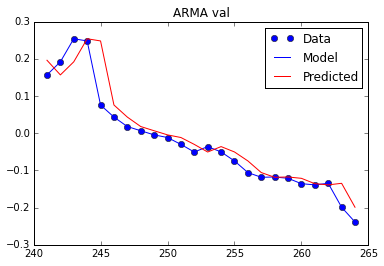

In [32]:
model.plot_pred("ARMA val", indicator, indicator, prev_val[0], fc_ar[1])

#### Comparison

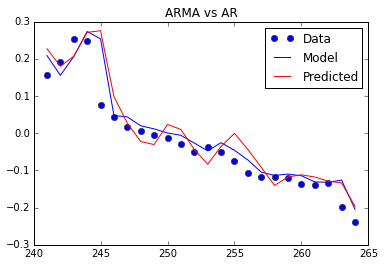

In [33]:
model.plot_pred("ARMA vs AR", indicator, model.ARMA(indicator), fc_ar[0], fc_arma[1])

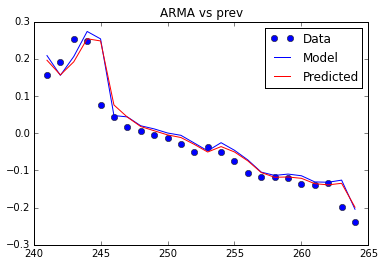

In [34]:
model.plot_pred("ARMA vs prev", indicator, model.ARMA(indicator), prev_val[0], fc_ar[1])

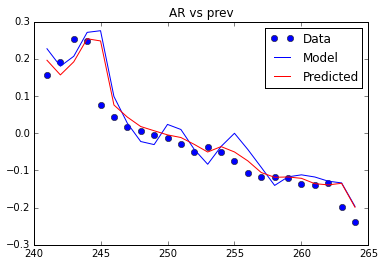

In [35]:
model.plot_pred("AR vs prev", indicator, model.AR(indicator), prev_val[0], fc_ar[1])